## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of unique  mice, drugs and timepoints.
mice_all = merge_df['Mouse ID'].count()
print('total mice data', mice_all,"\n")

unique_times = merge_df["Timepoint"].unique()
print('unique timepoints', len(unique_times))
print(unique_times,"\n")

unique_drugs = merge_df["Drug Regimen"].unique()
print("unique drugs", len(unique_drugs))
print(unique_drugs,"\n")

unique_mice = merge_df["Mouse ID"].unique()
print('unique mice', len(unique_mice))
print(unique_mice)


total mice data 1893 

unique timepoints 10
[ 0  5 10 15 20 25 30 35 40 45] 

unique drugs 10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol'] 

unique mice 249
['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246'

In [172]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

for mouse in unique_mice:
    dup_mouse_names=merge_df.loc[merge_df["Mouse ID"] == mouse]
# find the column height of first dimension of the array
    height=dup_mouse_names.shape[0]
   
    if height > len(unique_times):
        print('mice ', mouse, ' has ', height, ' duplicate points',"\n")
        
#Get all the data for the duplicate mouse ID.
        print(dup_mouse_names)
    
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
        cleaned_df = merge_df.drop(merge_df.loc[merge_df["Mouse ID"] == mouse].index) 

#cleaned_df.head()

In [6]:
# Checking the number of mice in the clean DataFrame.
print('number of mice', len(cleaned_df))
# count ofter dropped rows
cleaned_df.count()

number of mice 1880


Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of the tumor volume for each regimen

# groupby drug
grouped_drug_df = cleaned_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
ser1 = grouped_drug_df['Tumor Volume (mm3)'].mean()
ser2 = grouped_drug_df['Tumor Volume (mm3)'].median()
ser3 = grouped_drug_df['Tumor Volume (mm3)'].var()
ser4 = grouped_drug_df['Tumor Volume (mm3)'].std()
ser5 = grouped_drug_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe
ser12 = pd.merge(ser1,ser2, on='Drug Regimen')
ser12_new = ser12.rename(columns={"Tumor Volume (mm3)_x": "mean","Tumor Volume (mm3)_y": "median" })
ser23 = pd.merge(ser12_new,ser3, on='Drug Regimen')
ser34 = pd.merge(ser23,ser4, on='Drug Regimen')
ser45 = pd.merge(ser34,ser5, on='Drug Regimen')
tumor_vol_stat_df = ser45.rename(columns={"Tumor Volume (mm3)_x": "var",
                                          "Tumor Volume (mm3)_y": "std",
                                        "Tumor Volume (mm3)": "sem" })
tumor_vol_stat_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
grouped_drug_df["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

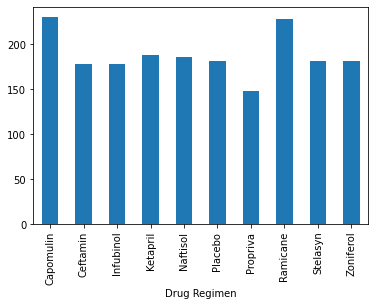

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# group by drug and timepoints
group_by_drug = cleaned_df.groupby(['Drug Regimen'])
tot_time_df = group_by_drug.count()
tot_time_df['Timepoint'].plot(x = 'Drug Regimen', y='Timepoint', kind = 'bar')
plt.show()

<BarContainer object of 10 artists>

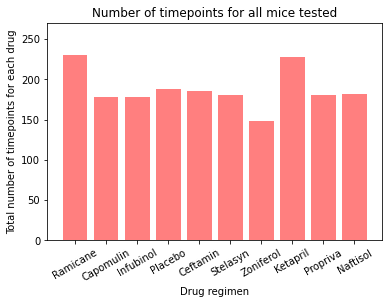

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = unique_drugs
yy = tot_time_df['Timepoint']

plt.xticks(rotation=30)
plt.ylim(0, max(yy)+40)
plt.title("Number of timepoints for all mice tested")
plt.xlabel("Drug regimen")
plt.ylabel("Total number of timepoints for each drug")
plt.bar(x_axis, yy, color='r', alpha=0.5, align="center")

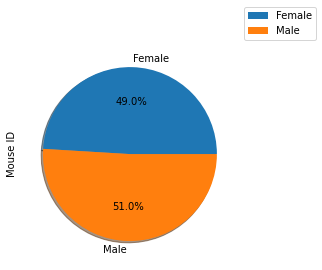

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_list = ['Female', 'Male']
rcleaned_df = cleaned_df[['Drug Regimen', "Sex","Mouse ID"]]
rcleaned_df.head(20)
for drug in unique_drugs:
    drug_chart=rcleaned_df.loc[cleaned_df["Drug Regimen"] == drug]
    for gender in gender_list:
        male_chart=rcleaned_df.loc[cleaned_df["Sex"] == 'Male']
        female_chart=rcleaned_df.loc[cleaned_df["Sex"] == 'Female']

df3 = male_chart.append(female_chart, ignore_index=True)

gender_pie = df3.groupby(['Sex']).count().plot(kind="pie",autopct='%1.1f%%', 
                    radius=1, shadow=True,  y='Mouse ID')
gender_pie.legend(bbox_to_anchor=(1, 1.2), loc='upper left')


Male 958 Female 922


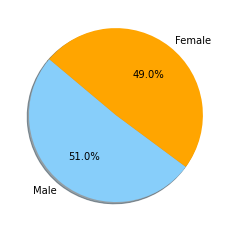

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male', 'Female']
mm = male_chart["Sex"].count().sum()

ff = female_chart["Sex"].count().sum()

print('Male', mm, 'Female',ff)

# # The values of each section of the pie chart
sizes = [mm,ff]

# # The colors of each section of the pie chart
colors = ["lightskyblue","orange" ]


plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

selected_df =cleaned_df[['Drug Regimen','Mouse ID',"Timepoint", 'Tumor Volume (mm3)']]

# Put treatments into a list for for loop (and later for plot labels)
sel_drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
max_vol= []

unique_mice = selected_df["Mouse ID"].unique()   
unique_df = pd.DataFrame(columns=selected_df.columns, index=unique_mice)
# Locate the rows which contain mice on each drug and get the tumor volumes
for mouse in unique_mice:
    mouse_df=selected_df.loc[selected_df["Mouse ID"] == mouse]
    height=mouse_df.shape[0]
    unique_df.loc[mouse,:]= mouse_df.iloc[height-1,:]

sel_drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

for drug in sel_drugs:
    new2_df = unique_df.loc[unique_df.loc[unique_df["Drug Regimen"]==drug].index]
    new3 = new2_df.loc[:,["Tumor Volume (mm3)"]]
    max_vol.append(new3)
max_vol = pd.concat(max_vol)
print(max_vol)


     Tumor Volume (mm3)
k403          22.050126
g791          29.128472
s508          30.276232
m546          30.564625
z578          30.638696
...                 ...
x226               45.0
x581          64.634949
x822           61.38666
y769          68.594745
y865          64.729837

[100 rows x 1 columns]


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds
  
lowerq=np.quantile(max_vol, .25, axis = None)
mediantu=np.quantile(max_vol, .5, axis = None)
upperq=np.quantile(max_vol, .75, axis = None)

# Inter Quartile Range (iqr)
iqr = upperq-lowerq

print(f"The lower quartile of tumor_vol is: {lowerq}")
print(f"The upper quartile of tumor_vol is: {upperq}")
print(f"The interquartile range of tumor_vol is: {iqr}")
print(f"The the median of tumor_vol is: {mediantu} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor_vol is: 37.1877438025
The upper quartile of tumor_vol is: 59.930261755
The interquartile range of tumor_vol is: 22.742517952499995
The the median of tumor_vol is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


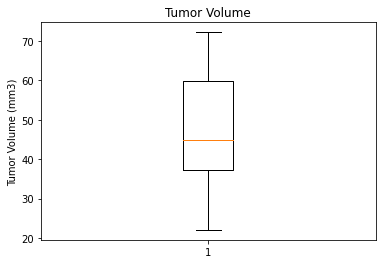

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(max_vol)
plt.show()

## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

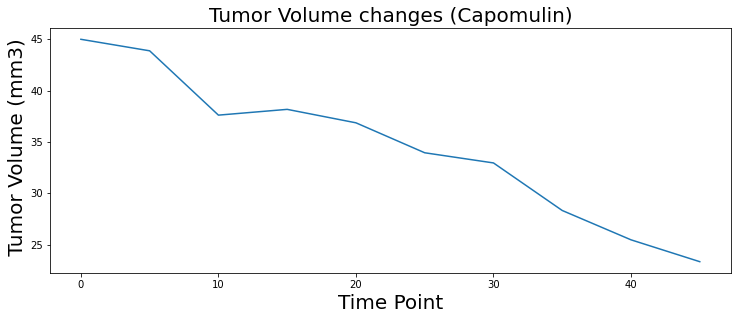

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"]=='Capomulin']
capomulin_data = capomulin_data.loc[cleaned_df["Mouse ID"]=='s185']
print(capomulin_data)

plt.figure(figsize = (12.2, 4.5))
plt.plot(capomulin_data.loc[:, 'Timepoint'], capomulin_data.loc[:, 'Tumor Volume (mm3)'])
plt.title('Tumor Volume changes (Capomulin)',fontsize=20)
plt.xlabel('Time Point',fontsize=20)
plt.ylabel(' Tumor Volume (mm3)',fontsize=20)
plt.show()

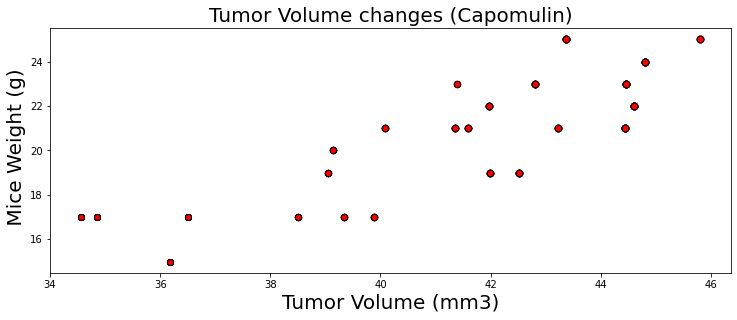

In [126]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
import statistics

capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"]=='Capomulin']
plot_avg_tumor_vol = []
plot_avg_weight = []
plt.figure(figsize = (12.2, 4.5))
plt.title('Tumor Volume changes (Capomulin)',fontsize=20)
plt.xlabel('Tumor Volume (mm3)',fontsize=20)
plt.ylabel(' Mice Weight (g)',fontsize=20)
for mouse in capomulin_data["Mouse ID"]:
    mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"]==mouse]
    m_weight = statistics.mean(mouse_data['Tumor Volume (mm3)'].values)
    t_volume = statistics.mean(mouse_data['Weight (g)'].values)
    plt.scatter(m_weight, t_volume, marker="o", facecolors="red", edgecolors="black",
            s=m_weight, alpha=0.75)

## Correlation and Regression

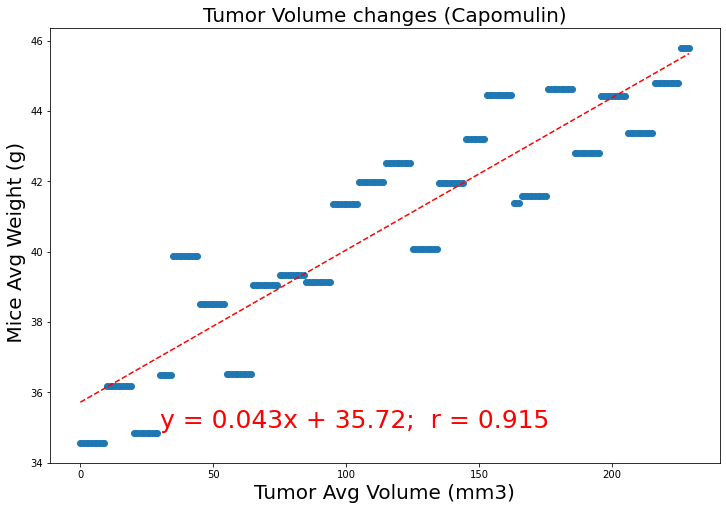

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import scipy.stats as st
from scipy.stats import linregress

capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"]=='Capomulin']
scatter_mweight = capomulin_data["Tumor Volume (mm3)"]
x_axis = np.arange(len(scatter_mweight)) 
#print(x_axis)

avg_weight = []
avg_volume = []

for mouse in capomulin_data["Mouse ID"]:
    mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"]==mouse]
    m_weight = statistics.mean(mouse_data['Tumor Volume (mm3)'].values)
    t_volume = statistics.mean(mouse_data['Weight (g)'].values)
    avg_weight.append(m_weight)
    avg_volume.append(t_volume)
#Linear regression analysis
(mweight_slope, mweight_int, mweight_r, mweight_p, mweight_std_err) = linregress(x_axis,avg_weight)
fit_mweight = mweight_slope*x_axis + mweight_int

plt.figure(figsize=(12,8))
plt.scatter(x_axis,avg_weight)
plt.plot(x_axis, fit_mweight, "--", color = "r")

mweight_slope = mweight_slope.round(3)
mweight_int = mweight_int.round(3)
mweight_r = mweight_r.round(3)

plt.title('Tumor Volume changes (Capomulin)',fontsize=20)
plt.xlabel('Tumor Avg Volume (mm3)',fontsize=20)
plt.ylabel(' Mice Avg Weight (g)',fontsize=20)

plt.text(30,35,f"y = {mweight_slope}x + {mweight_int};  r = {mweight_r}", c = "r",fontsize=25)
plt.show()

In [ ]:
#Observations and Insights
# 1. There are no outliers for TUMOR VOLUME
# 2. plot of tumor volume vs. time point for a mouse treated with Capomulin indicates decrease in tumor volume with time point
# 3. Tumor average volume linearly increases with mice average weight.
#
#
